# Mace Head - Data Analysis

# Import all necesary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from time import process_time

from matplotlib.pyplot import figure

# Import Data

In [2]:
df = pd.read_csv('C:\\Users\\User\\Final Year Project/MaceHead_FileforML.csv', thousands=',', low_memory=False)
# You can also open with Excel and take a look at it.

In [3]:
df.head(5)

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,rhum,msl,indwdsp,wdsp,indwddir,wddir,Ozone,PM25,PM10
0,10/03/2014 00:00,0,0,0.0,0,6.6,0,6.2,5.6,9.1,93,1025.1,2,6,2,220,83.81940,13.83,64.94
1,10/03/2014 01:00,1,0,0.0,0,7.1,0,6.5,5.8,9.2,91,1025.8,2,6,2,230,84.49794,7.60,36.02
2,10/03/2014 02:00,2,0,0.0,0,6.8,0,6.1,5.4,8.9,90,1026.4,2,5,2,240,86.21424,6.11,25.10
3,10/03/2014 03:00,3,0,0.0,0,6.8,0,6.2,5.4,8.9,90,1027.1,2,7,2,270,76.19583,8.47,43.61
4,10/03/2014 04:00,4,0,0.0,0,6.1,0,5.7,5.1,8.8,92,1027.8,2,4,2,300,73.64133,13.84,81.55


In [4]:
df.tail(5)

,Date,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,rhum,msl,indwdsp,wdsp,indwddir,wddir,Ozone,PM25,PM10
46943,31/12/2020 02:00,2,0,0.0,0,3.3,0,2.1,0.2,6.2,79,1009.5,2,7,2,320,81.24495,2.41,4.13
46944,31/12/2020 11:00,11,0,0.0,0,5.3,0,4.5,3.4,7.8,87,1011.5,2,15,2,340,62.90446,0.94,1.18
46945,31/12/2020 13:00,13,0,0.0,0,6.3,0,5.2,3.6,7.9,82,1011.9,2,11,2,340,62.70489,0.99,1.84
46946,31/12/2020 21:00,21,0,0.0,0,6.2,0,4.6,2.4,7.2,76,1016.1,2,16,2,330,60.66928,0.31,0.85
46947,31/12/2020 22:00,22,0,0.0,0,6.0,0,4.7,2.8,7.5,80,1016.6,2,20,2,350,59.61156,1.59,2.18


In [5]:
df.describe() #Use this to see if there any indicators inferring bad data (this will be removed)

,Hour,indrain,rain,indtemp,temp,indwetb,wetb,dewpt,vappr,rhum,msl,indwdsp,wdsp,indwddir,wddir,Ozone,PM25,PM10
count,46948.000000,46948.0,46948.000000,46948.0,46948.000000,46948.0,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.0,46948.000000,46948.0,46948.000000,46948.000000,46948.000000,46948.000000
mean,11.505964,0.0,0.115528,0.0,11.188509,0.0,9.773843,8.236229,11.267907,82.226911,1012.968028,2.0,14.896652,2.0,212.327895,72.796604,4.919378,16.700781
std,6.940768,0.0,0.444559,0.0,3.750730,0.0,3.622862,4.094349,3.021881,10.421649,12.122572,0.0,7.549921,0.0,85.157255,15.569590,3.835378,10.873902
min,0.000000,0.0,0.000000,0.0,-4.000000,0.0,-4.900000,-8.000000,3.300000,34.000000,962.800000,2.0,0.000000,2.0,10.000000,11.355530,0.080000,0.460000
25%,5.000000,0.0,0.000000,0.0,8.500000,0.0,7.200000,5.300000,8.900000,75.000000,1005.600000,2.0,9.000000,2.0,150.000000,62.225930,2.290000,8.750000
50%,11.000000,0.0,0.000000,0.0,11.200000,0.0,9.900000,8.600000,11.200000,83.000000,1014.100000,2.0,14.000000,2.0,230.000000,73.940690,3.980000,14.560000
75%,18.000000,0.0,0.000000,0.0,14.100000,0.0,12.600000,11.300000,13.400000,91.000000,1021.300000,2.0,20.000000,2.0,280.000000,84.418110,6.440000,22.250000
max,23.000000,0.0,12.600000,0.0,28.800000,0.0,20.800000,18.700000,21.600000,100.000000,1048.700000,2.0,51.000000,2.0,360.000000,158.578320,92.110000,190.690000


# What does this tell us

From the meteorological metadata, each indicator has different values which tells us if data is valid or junk!

Since I've already removed "None" values from the PM data this has eliminated most junk values. However, by looking at the min and max values of the indicator columns, the only column with remaining junk data is the wind direction column. Therefore I will need to analyse this further.

I'll check all five indicators as good practice

In [6]:
#Code to count
df['indrain'].value_counts()

0    46948
Name: indrain, dtype: int64

In [7]:
df['indtemp'].value_counts()

0    46948
Name: indtemp, dtype: int64

In [8]:
df['indwetb'].value_counts()

0    46948
Name: indwetb, dtype: int64

In [9]:
df['indwdsp'].value_counts()

2    46948
Name: indwdsp, dtype: int64

In [10]:
df['indwddir'].value_counts()

2    46948
Name: indwddir, dtype: int64

This last indicator is where we expected to see the warning of bad data. From the Metadata, a value of 2 indicates valid data, while a value of 7 indicates junk data! 

We need to remove all the rows (one) with this 7 value in the indwddir column.

In [11]:
#Code to remove the junk data row
import csv

with open('C:\\Users\\User\\Final Year Project/Met and Pollutant Data Mace Head 2014 - 2020 (Rows deleted).csv', 'r') as fin, open('MaceHead_FileforML.csv', 'w', newline='') as fout:

    # define reader and writer objects
    reader = csv.reader(fin, skipinitialspace=True)
    writer = csv.writer(fout, delimiter=',')

    # write headers
    writer.writerow(next(reader))

    # iterate and write rows based on condition
    for i in reader:
        if int(i[-5]) == 2:
            writer.writerow(i) 
            
df = pd.read_csv('MaceHead_FileforML.csv', thousands=',', low_memory=False)

In [12]:
#Check removal of junk row
df['indwddir'].value_counts()

2    46948
Name: indwddir, dtype: int64

# Look at data type of each column

In [13]:
df.dtypes #Look at the datatypes

Date         object
Hour          int64
indrain       int64
rain        float64
indtemp       int64
temp        float64
indwetb       int64
wetb        float64
dewpt       float64
vappr       float64
rhum          int64
msl         float64
indwdsp       int64
wdsp          int64
indwddir      int64
wddir         int64
Ozone       float64
PM25        float64
PM10        float64
dtype: object

In [14]:
#Change the datatype of the date column (used for selecting timeframes later)
df['Date'] = df['Date'].astype('datetime64')

In [15]:
df.dtypes

Date        datetime64[ns]
Hour                 int64
indrain              int64
rain               float64
indtemp              int64
temp               float64
indwetb              int64
wetb               float64
dewpt              float64
vappr              float64
rhum                 int64
msl                float64
indwdsp              int64
wdsp                 int64
indwddir             int64
wddir                int64
Ozone              float64
PM25               float64
PM10               float64
dtype: object

<Figure size 1800x720 with 0 Axes>

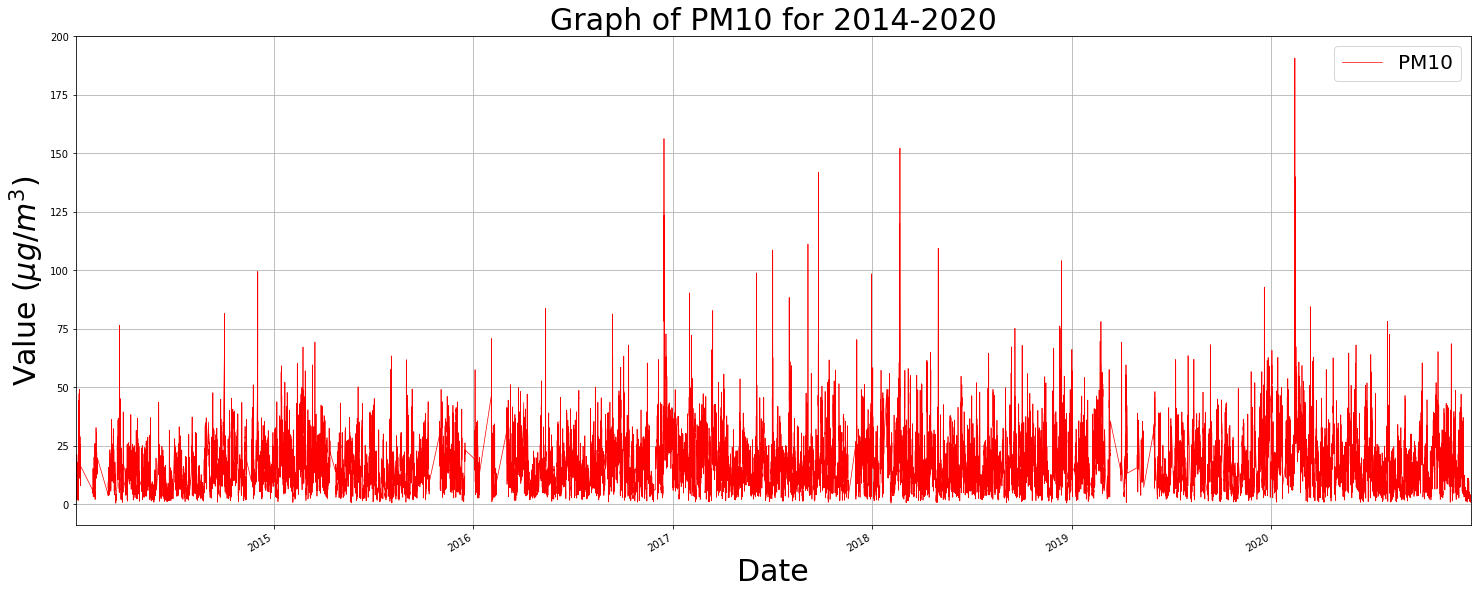

<Figure size 1800x720 with 0 Axes>

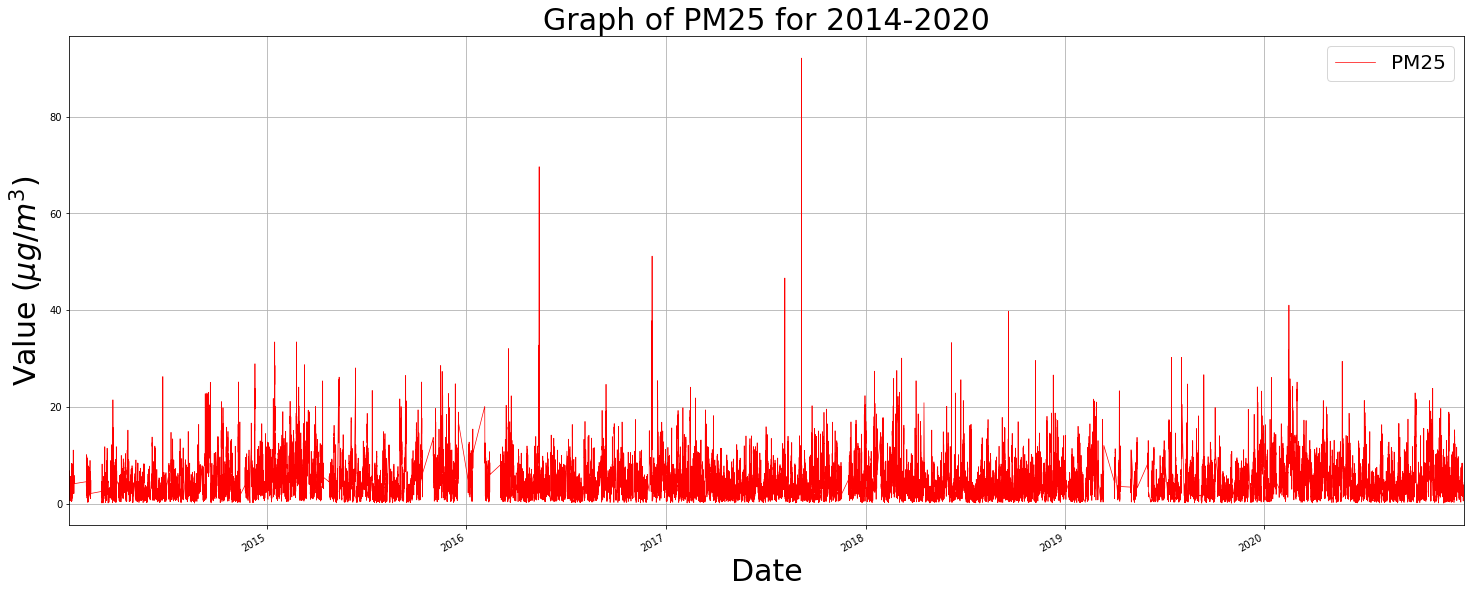

<Figure size 1800x720 with 0 Axes>

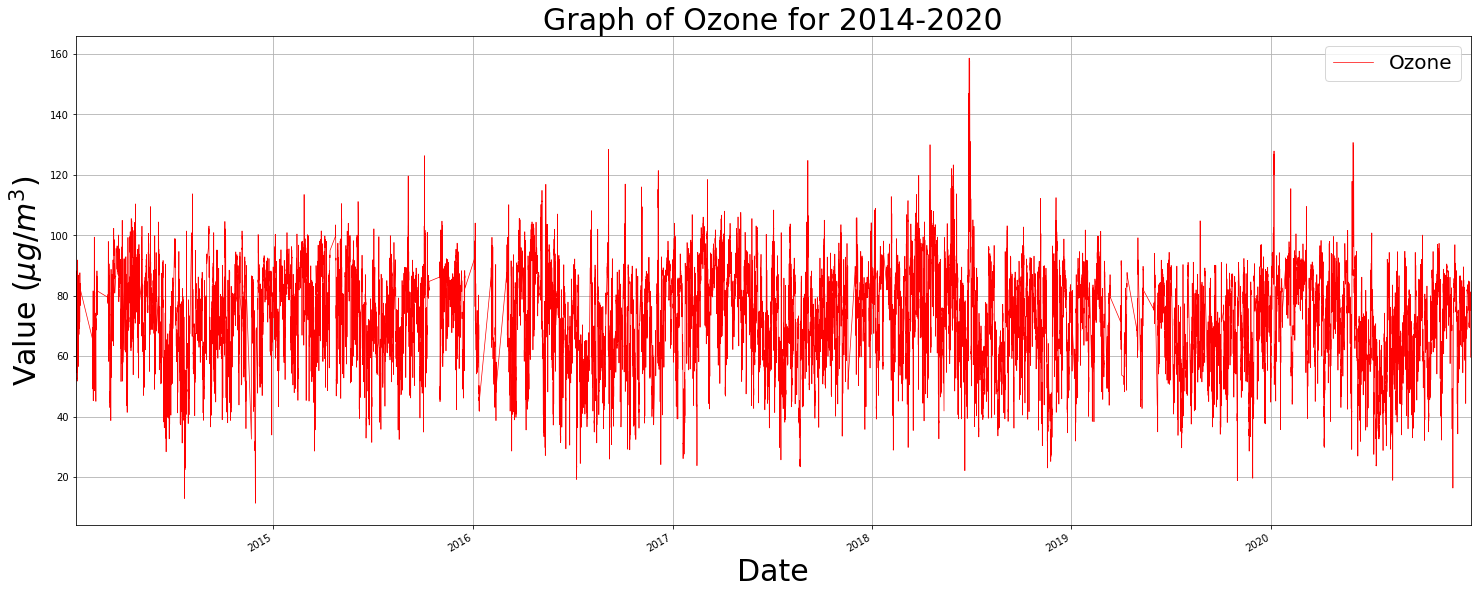

<Figure size 1800x720 with 0 Axes>

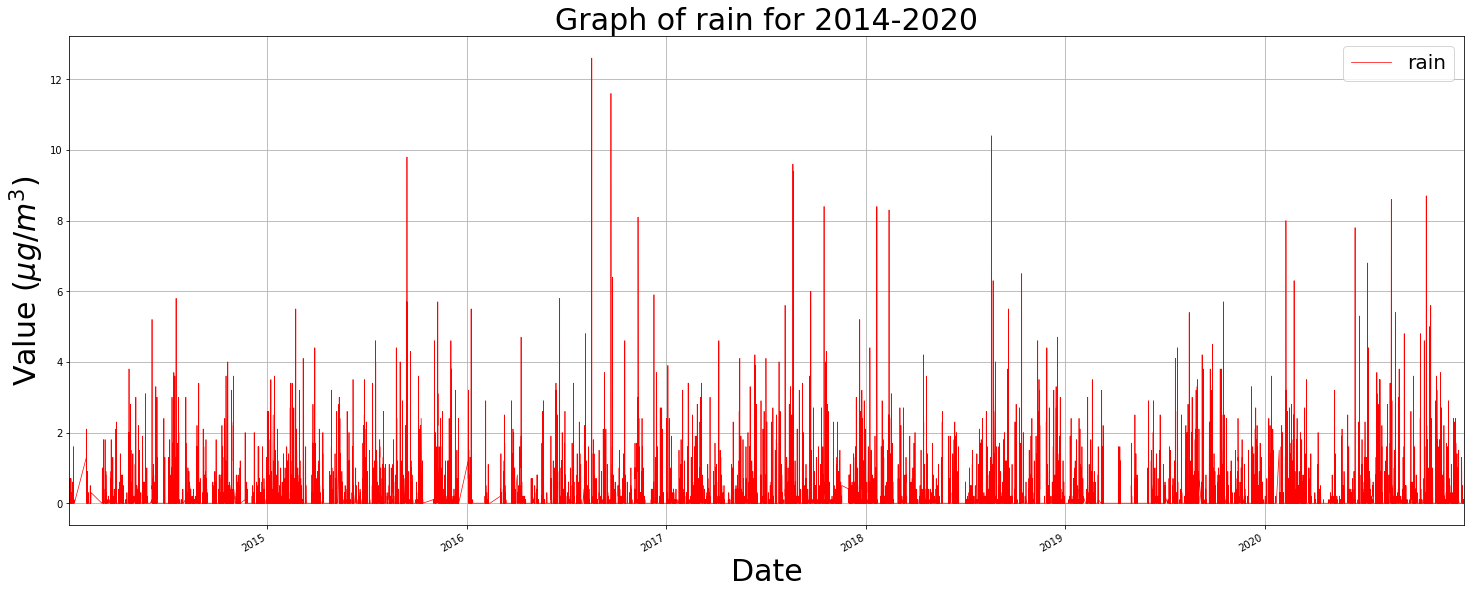

<Figure size 1800x720 with 0 Axes>

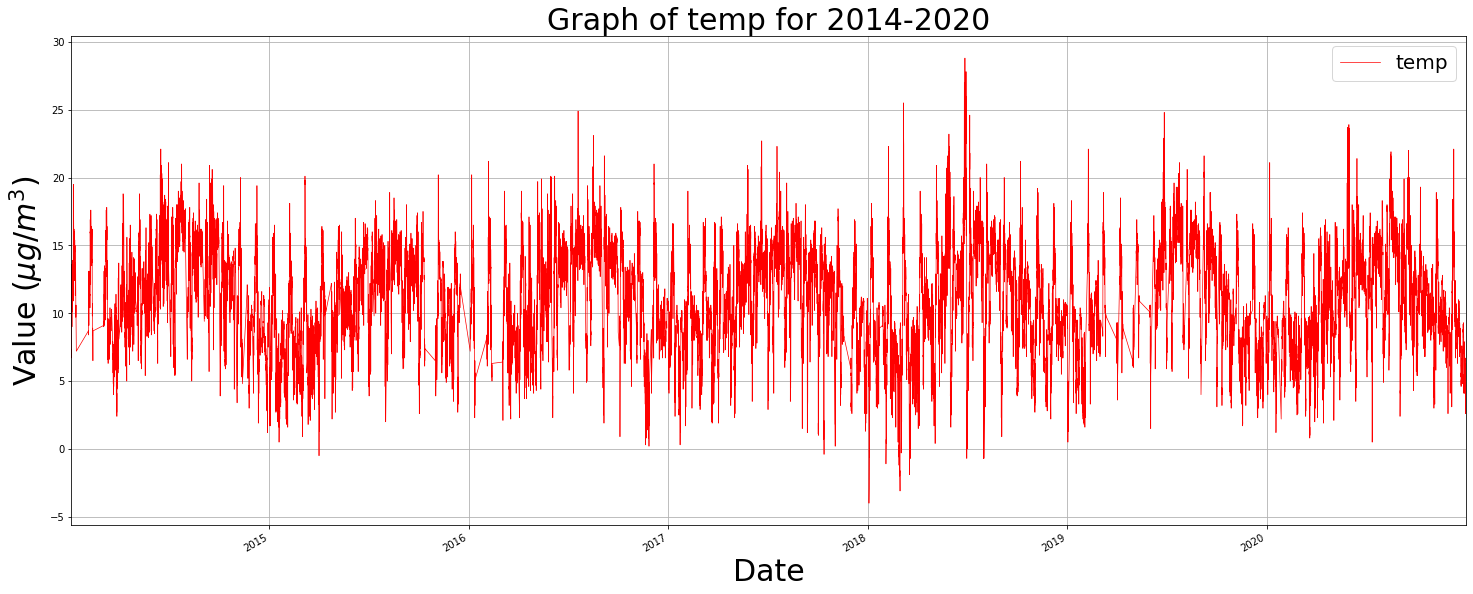

In [17]:
def PlotFeature(Name, Data1):
    
    figure(figsize=(25, 10))
    
    
    Data1.plot(x='Date', y=Name, linewidth=0.7, figsize=(25, 10), color=['red'])
    plt.title("Graph of {} for 2014-2020".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()
    
PlotFeature('PM10', df)
PlotFeature('PM25', df)
PlotFeature('Ozone', df)
PlotFeature('rain', df)
PlotFeature('temp', df)


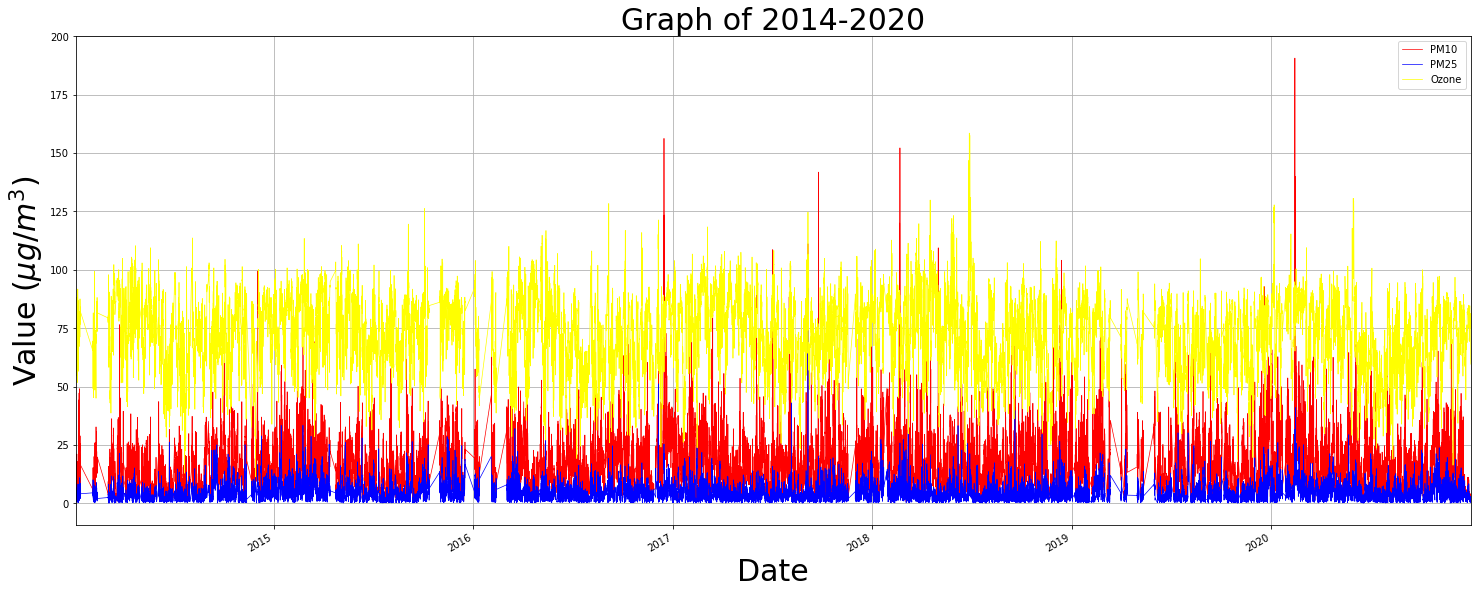

In [19]:
#Function for plotting PM10, PM2.5 and Ozone time series
def PMPlotdf(Frame):
    
    Frame.plot(x='Date', y=['PM10', 'PM25', 'Ozone'], linewidth=0.7, figsize=(25, 10), color=['red', 'blue', 'yellow'])
    plt.title("Graph of 2014-2020", fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend()
    plt.grid()
    plt.show()
    
    
PMPlotdf(df)

No handles with labels found to put in legend.


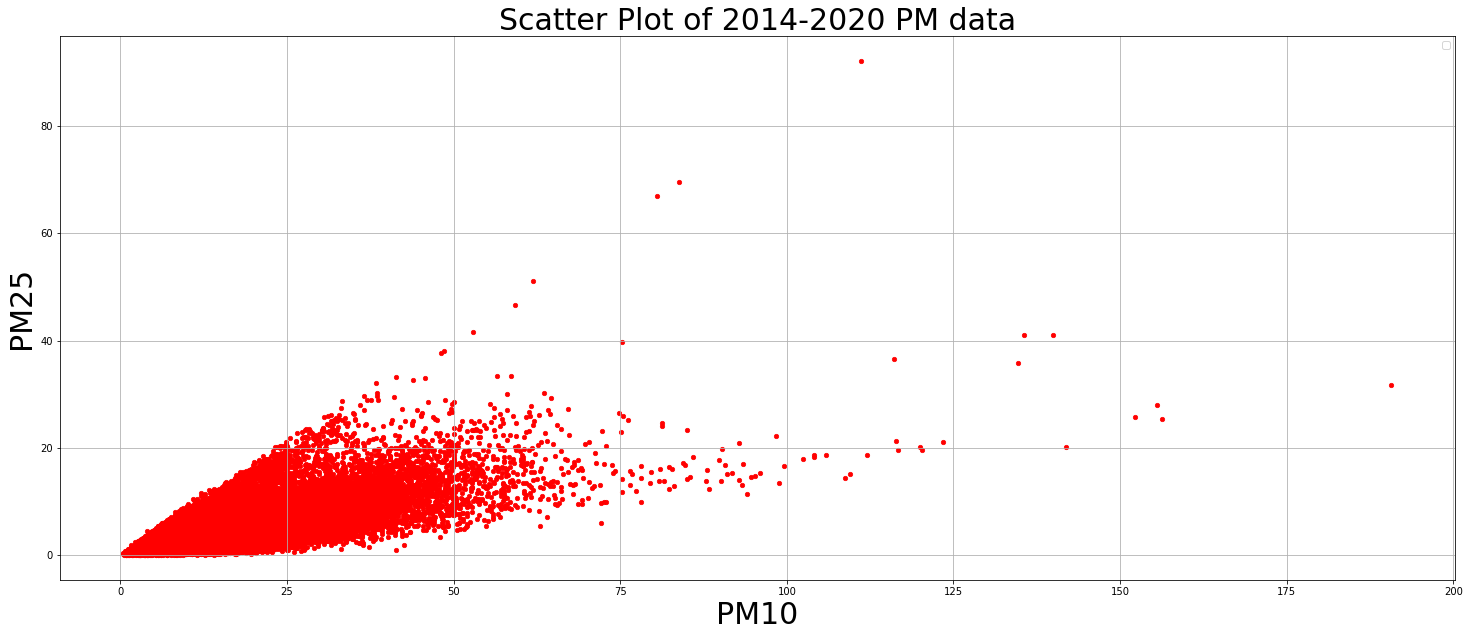

In [27]:
def PMScatterPlotdf(Frame):
    Frame.plot.scatter(x='PM10', y='PM25', linewidth=0.7, figsize=(25, 10), color=['red'])
    plt.title("Scatter Plot of 2014-2020 PM data", fontsize=30)
    plt.xlabel("PM10", fontsize=30)
    plt.ylabel("PM25", fontsize=30)
    plt.legend()
    plt.grid()
    plt.show()

    
PMScatterPlotdf(df)

In [28]:
#But for now I'll take one year of data and try some algorithms
#To start I'll delete now unnecessary columns 
df.drop('indrain', axis=1, inplace=True)

In [29]:
df.drop('indwetb', axis=1, inplace=True)

In [30]:
df.drop('indtemp', axis=1, inplace=True)

In [31]:
df.drop('indwdsp', axis=1, inplace=True)

In [32]:
df.drop('indwddir', axis=1, inplace=True)

In [33]:
df.drop('Date', axis=1, inplace=True)

# Let's look at the data for algorithm

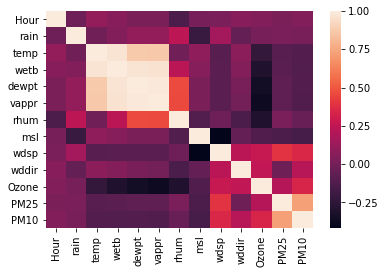

In [34]:
#Heatmap
sns.heatmap(df.corr());

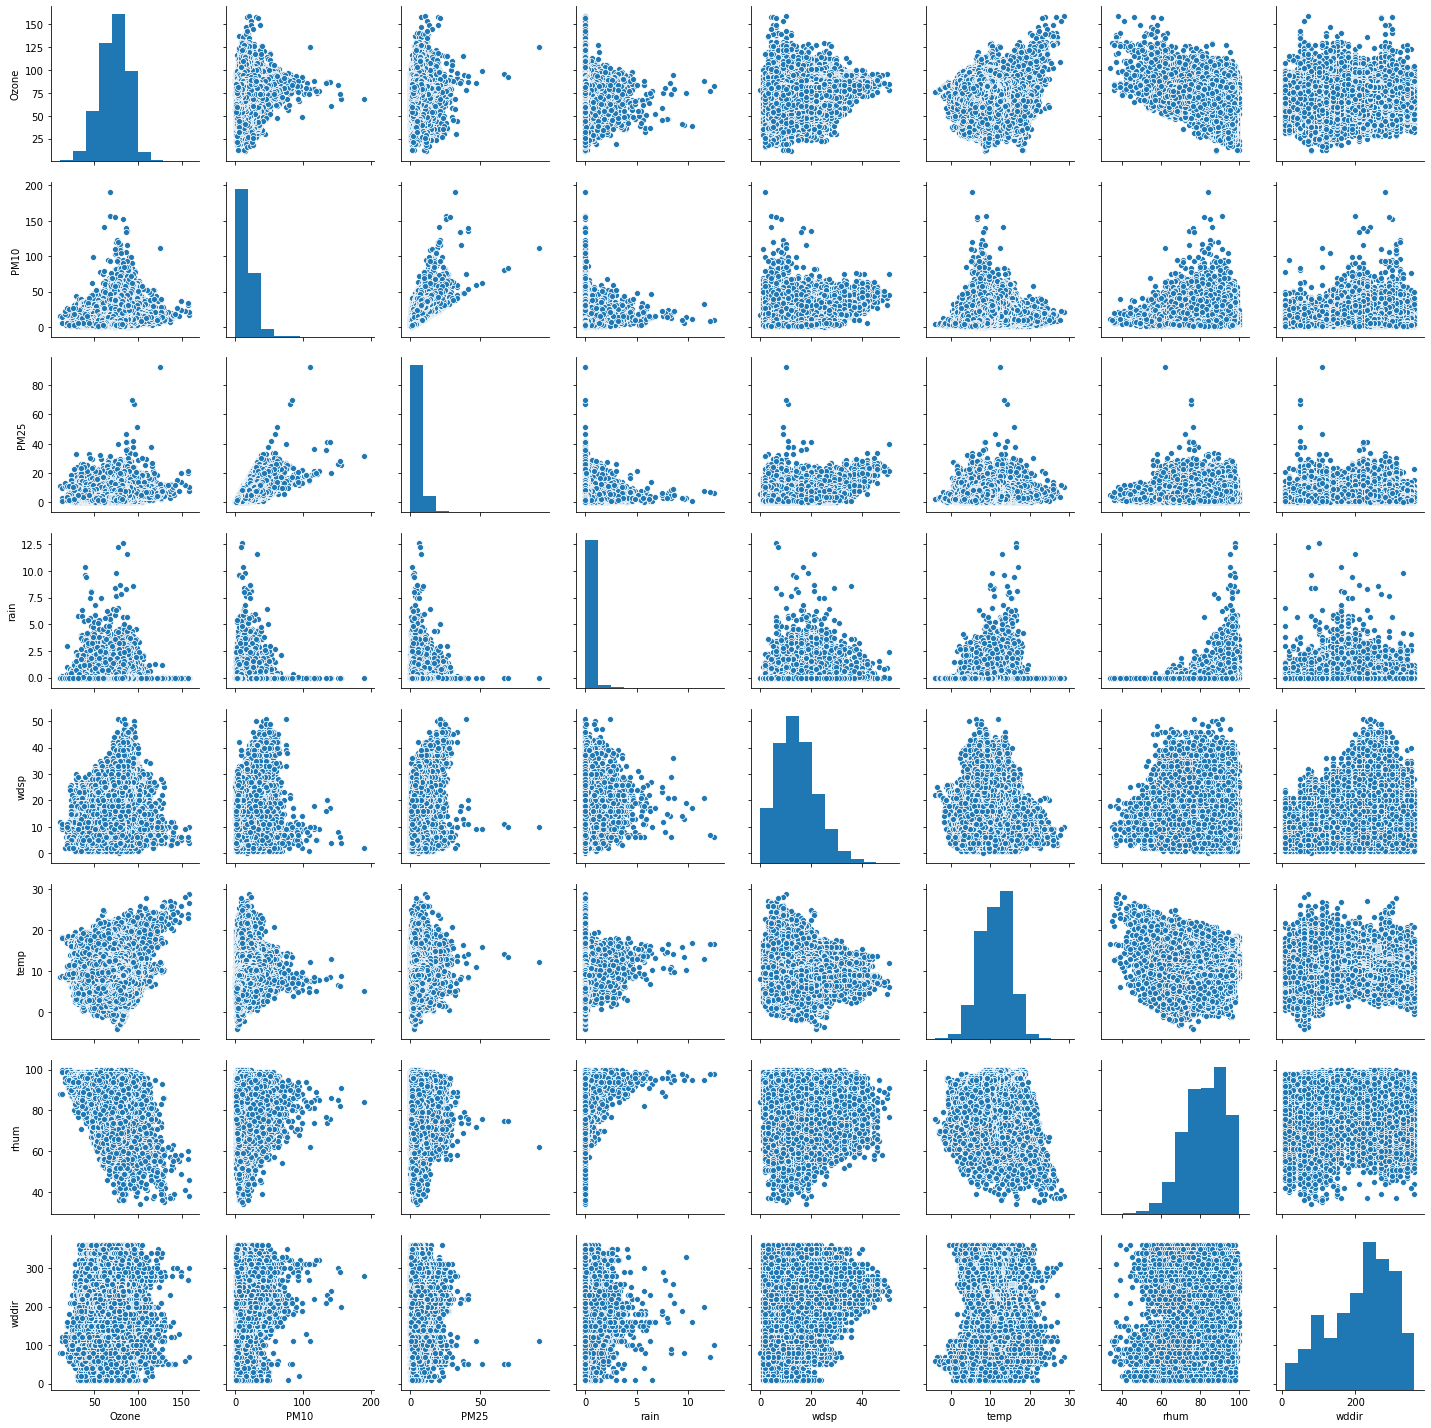

In [35]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['Ozone','PM10','PM25','rain','wdsp','temp','rhum','wddir']].dropna())
plt.show()

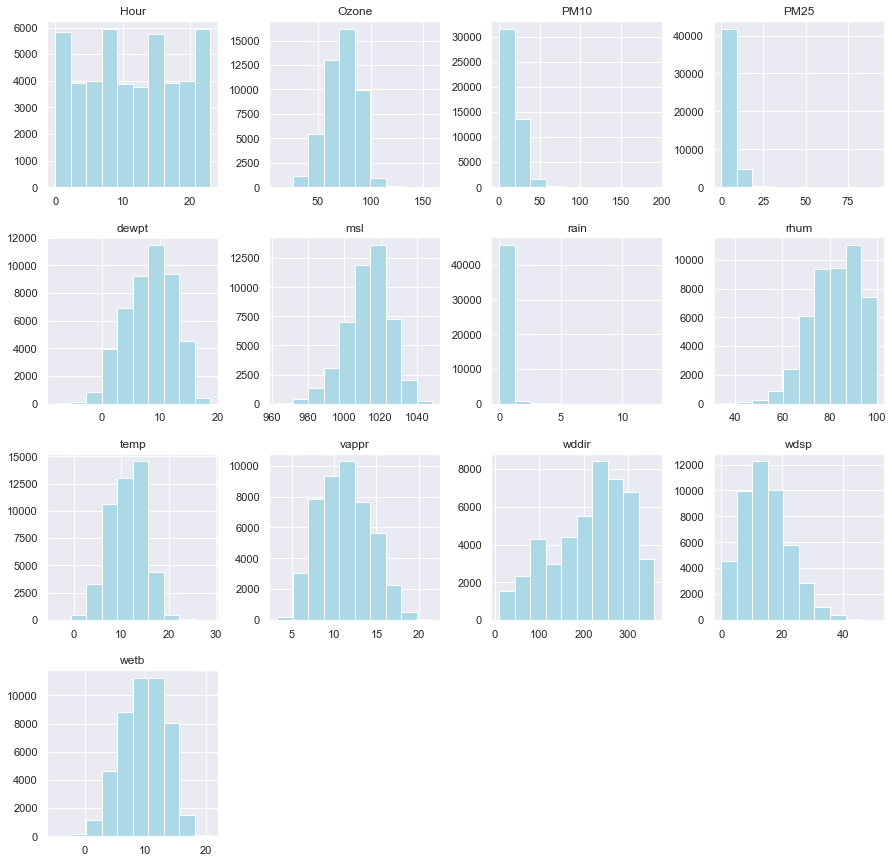

In [36]:
#Histograms
sns.set()
pd.DataFrame.hist(df, figsize = [15,15], color='lightblue')
plt.show()

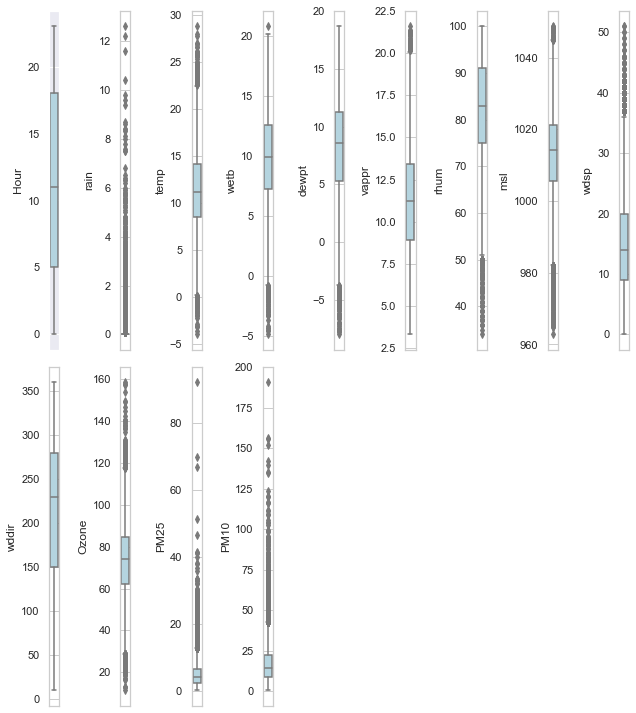

In [37]:
l = df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='lightblue',orient='v')
    plt.tight_layout()

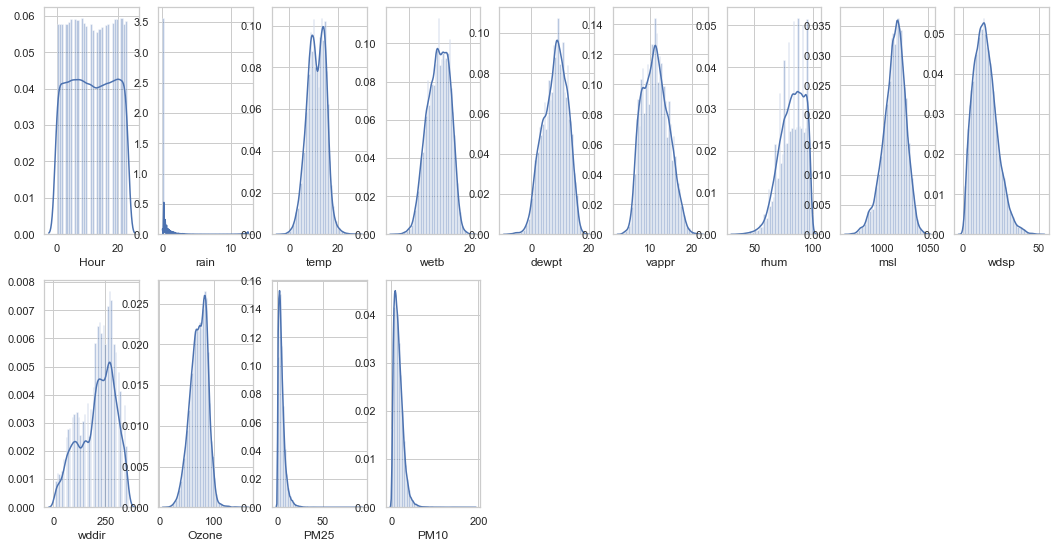

In [38]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

In [39]:
df.describe()

,Hour,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,Ozone,PM25,PM10
count,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000
mean,11.505964,0.115528,11.188509,9.773843,8.236229,11.267907,82.226911,1012.968028,14.896652,212.327895,72.796604,4.919378,16.700781
std,6.940768,0.444559,3.750730,3.622862,4.094349,3.021881,10.421649,12.122572,7.549921,85.157255,15.569590,3.835378,10.873902
min,0.000000,0.000000,-4.000000,-4.900000,-8.000000,3.300000,34.000000,962.800000,0.000000,10.000000,11.355530,0.080000,0.460000
25%,5.000000,0.000000,8.500000,7.200000,5.300000,8.900000,75.000000,1005.600000,9.000000,150.000000,62.225930,2.290000,8.750000
50%,11.000000,0.000000,11.200000,9.900000,8.600000,11.200000,83.000000,1014.100000,14.000000,230.000000,73.940690,3.980000,14.560000
75%,18.000000,0.000000,14.100000,12.600000,11.300000,13.400000,91.000000,1021.300000,20.000000,280.000000,84.418110,6.440000,22.250000
max,23.000000,12.600000,28.800000,20.800000,18.700000,21.600000,100.000000,1048.700000,51.000000,360.000000,158.578320,92.110000,190.690000


# Adjust data to avoid zero's

In [41]:
df['Ozone'] = df['Ozone']+1.00
df['rain'] = df['rain']+1.00
df['rain'] = df['rain']+1.00
df['rain'] = df['rain']+1.00
df['PM25'] = df['PM25']+1.00
df['PM10'] = df['PM10']+1.00
df['wdsp'] = df['wdsp']+1.00
df['temp'] = df['temp']+5.00
df['Hour'] = df['Hour']+1.00
df['wddir'] = df['wddir']/360 + 1.00
df['msl'] = df['msl']/1000

In [43]:
df.describe()

,Hour,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,Ozone,PM25,PM10
count,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000,46948.000000
mean,12.505964,3.115528,16.188509,9.773843,8.236229,11.267907,82.226911,1.012968,15.896652,1.589800,73.796604,5.919378,17.700781
std,6.940768,0.444559,3.750730,3.622862,4.094349,3.021881,10.421649,0.012123,7.549921,0.236548,15.569590,3.835378,10.873902
min,1.000000,3.000000,1.000000,-4.900000,-8.000000,3.300000,34.000000,0.962800,1.000000,1.027778,12.355530,1.080000,1.460000
25%,6.000000,3.000000,13.500000,7.200000,5.300000,8.900000,75.000000,1.005600,10.000000,1.416667,63.225930,3.290000,9.750000
50%,12.000000,3.000000,16.200000,9.900000,8.600000,11.200000,83.000000,1.014100,15.000000,1.638889,74.940690,4.980000,15.560000
75%,19.000000,3.000000,19.100000,12.600000,11.300000,13.400000,91.000000,1.021300,21.000000,1.777778,85.418110,7.440000,23.250000
max,24.000000,15.600000,33.800000,20.800000,18.700000,21.600000,100.000000,1.048700,52.000000,2.000000,159.578320,93.110000,191.690000


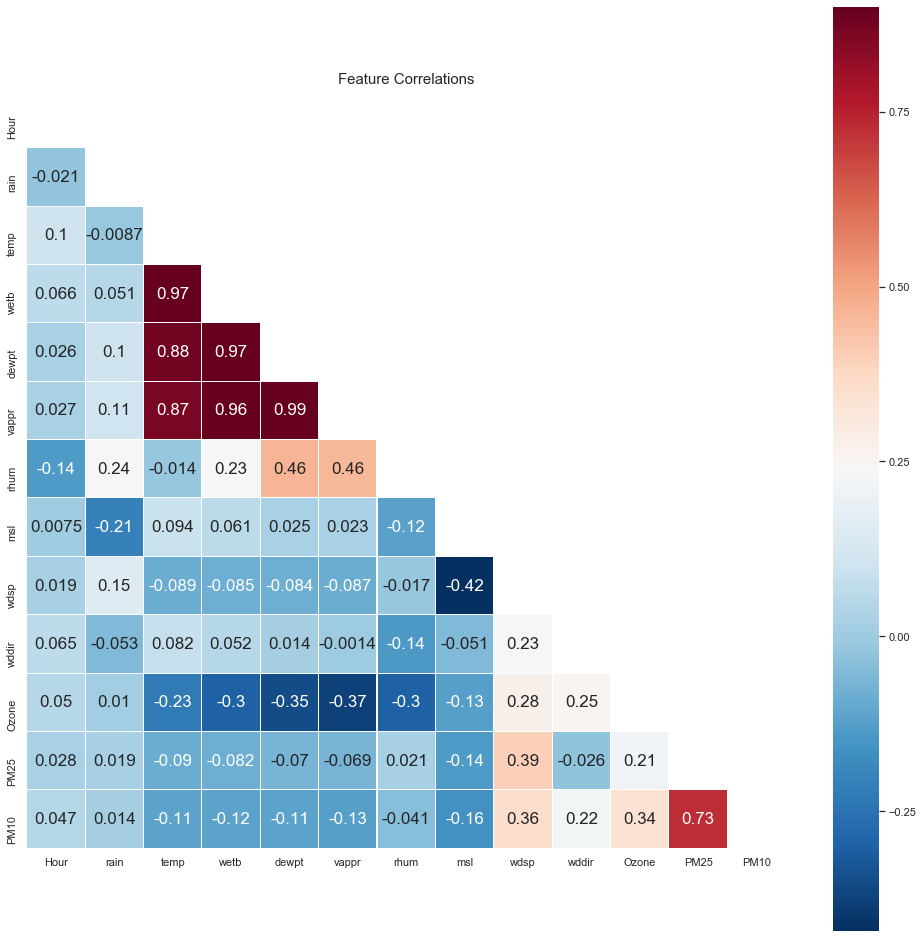

In [44]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (17,17))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True,
            annot_kws={"size":17})
plt.title("Feature Correlations", y = 1.4,fontsize = 15)
plt.rcParams['axes.labelsize'] = 15
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
plt.show()

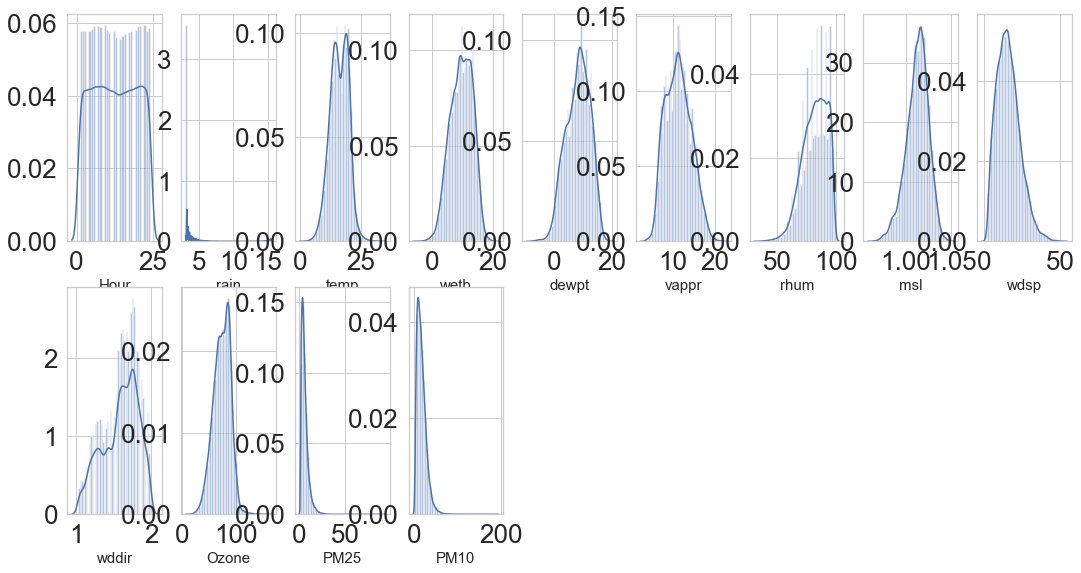

In [45]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

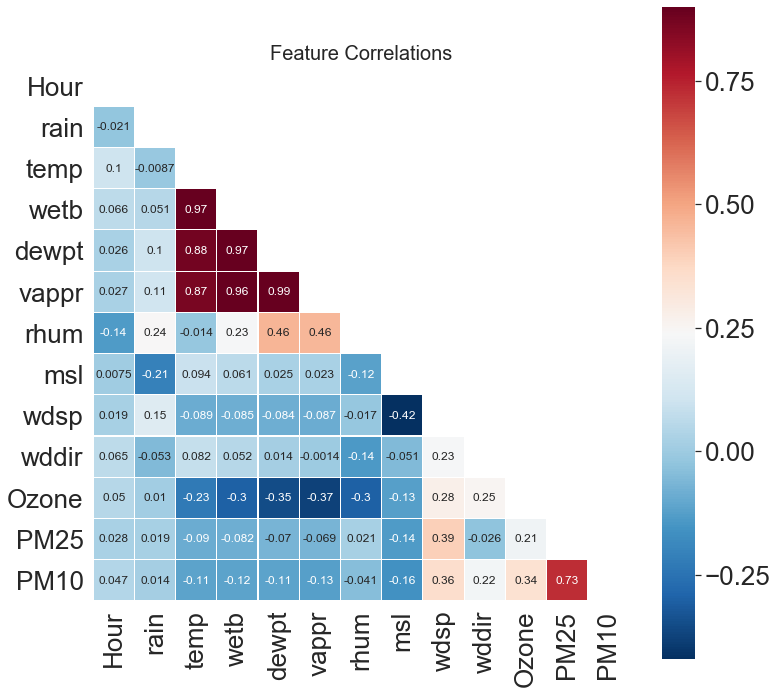

In [46]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Feature Correlations", y = 1.03,fontsize = 20)
plt.show()